<a href="https://colab.research.google.com/github/raghav-fr/Models-for-hackathon/blob/main/CropPredictionWithoutChemicals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Crop Prediction without knowing Soil Chemicals**

# **Load Data**

In [ ]:
import pandas as pd
df = pd.read_csv('cpdata.csv')
df.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


# **Data Preparation**

## **Encode Label**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

In [ ]:
df

,temperature,humidity,ph,rainfall,label,label_encoded
0,20.879744,82.002744,6.502985,202.935536,rice,28
1,21.770462,80.319644,7.038096,226.655537,rice,28
2,23.004459,82.320763,7.840207,263.964248,rice,28
3,26.491096,80.158363,6.980401,242.864034,rice,28
4,20.130175,81.604873,7.628473,262.717340,rice,28
...,...,...,...,...,...,...
3093,25.287846,89.636679,6.765095,58.286977,watermelon,29
3094,26.638386,84.695469,6.189214,48.324286,watermelon,29
3095,25.331045,84.305338,6.904242,41.532187,watermelon,29
3096,26.897502,83.892415,6.463271,43.971937,watermelon,29


## **Separation of data in x and y**

In [ ]:
x=df.drop(['label','label_encoded'],axis=1)
y=df['label_encoded']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
y_train.shape

(2478,)

# **Model Building**

## **Random Forest**

### **Model Training**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200,random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

### **Applying the model for prediction**

In [ ]:
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

### **Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_test_pred)

print(f"\n🎯 Model Accuracy: {accuracy*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_test_pred, target_names=le.classes_))



🎯 Model Accuracy: 94.19%

Classification Report:
               precision    recall  f1-score   support

Adzuki Beans       1.00      1.00      1.00        23
  Black gram       1.00      1.00      1.00        21
    Chickpea       0.94      1.00      0.97        17
     Coconut       1.00      1.00      1.00        21
      Coffee       0.78      1.00      0.88        18
      Cotton       1.00      0.92      0.96        12
  Ground Nut       0.97      0.97      0.97        31
        Jute       0.88      0.88      0.88        17
Kidney Beans       1.00      0.94      0.97        18
      Lentil       1.00      1.00      1.00        23
  Moth Beans       1.00      0.95      0.98        21
   Mung Bean       1.00      1.00      1.00        20
        Peas       1.00      1.00      1.00        21
 Pigeon Peas       1.00      0.65      0.79        17
      Rubber       1.00      0.95      0.97        19
   Sugarcane       0.86      0.95      0.90        19
         Tea       0.85      1

### **Plotting the confusion matrix**

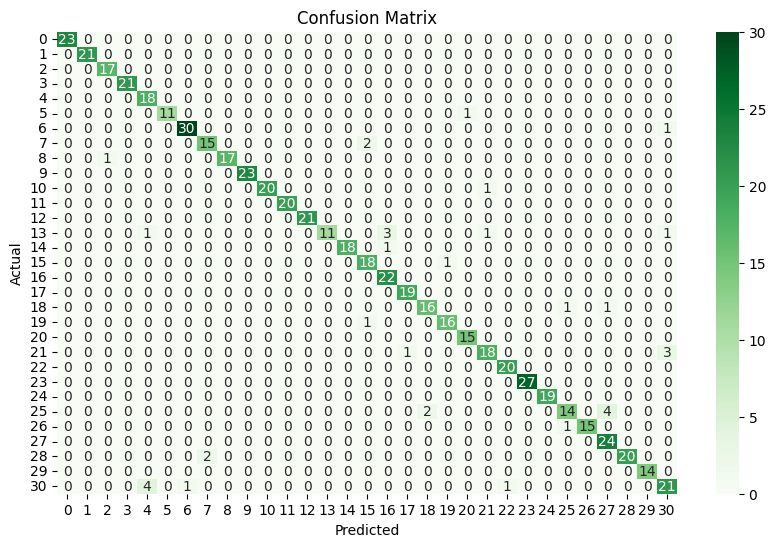

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='g', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### **Feature Importance**

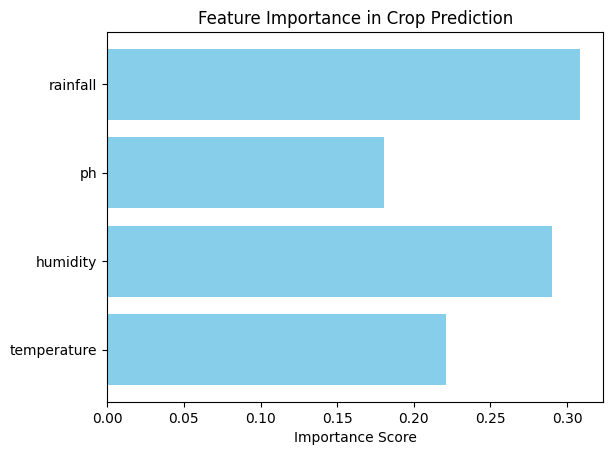

In [ ]:
importances = rf.feature_importances_
features = x.columns

plt.barh(features, importances, color='skyblue')
plt.xlabel("Importance Score")
plt.title("Feature Importance in Crop Prediction")
plt.show()

## **Xgboost Classifier**

### **Model Training**

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=200, random_state=42)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

### **Applying the model for prediction**

In [ ]:
y_xg_test_pred = xgb.predict(x_test)
y_xg_train_pred = xgb.predict(x_train)

### **Model evalution**

In [ ]:
accuracy_score_xg = accuracy_score(y_test, y_xg_test_pred)
print(f"\n🎯 Model Accuracy: {accuracy_score_xg*100:.2f}%")
print(f"\nClassification Report:\n{classification_report(y_test, y_xg_test_pred, target_names=le.classes_)}")


🎯 Model Accuracy: 92.10%

Classification Report:
              precision    recall  f1-score   support

Adzuki Beans       1.00      1.00      1.00        23
  Black gram       0.95      1.00      0.98        21
    Chickpea       0.94      1.00      0.97        17
     Coconut       1.00      1.00      1.00        21
      Coffee       0.68      0.72      0.70        18
      Cotton       1.00      0.83      0.91        12
  Ground Nut       0.97      0.97      0.97        31
        Jute       0.83      0.88      0.86        17
Kidney Beans       0.94      0.94      0.94        18
      Lentil       1.00      0.96      0.98        23
  Moth Beans       0.91      0.95      0.93        21
   Mung Bean       0.95      1.00      0.98        20
        Peas       1.00      1.00      1.00        21
 Pigeon Peas       0.73      0.65      0.69        17
      Rubber       1.00      0.84      0.91        19
   Sugarcane       0.82      0.95      0.88        19
         Tea       0.81      1.

### **Plotting the confusion matrix**

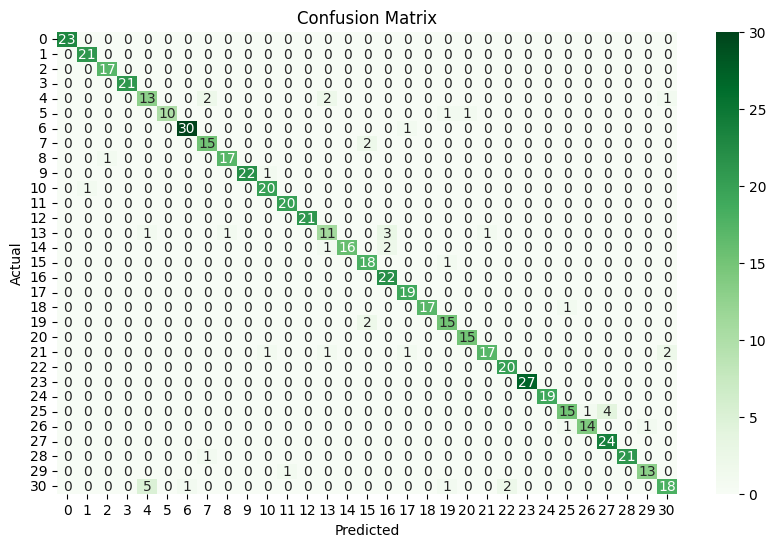

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_xg_test_pred), annot=True, fmt='g', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Trying custom inputs**

In [ ]:
import numpy as np
print("\n--- 🌱 Predict a Crop ---")
temp = float(input("Enter Temperature (°C): "))
hum = float(input("Enter Humidity (%): "))
ph = float(input("Enter Soil pH: "))
rain = float(input("Enter Rainfall (mm): "))

sample = np.array([[temp, hum, ph, rain]])
prediction = rf.predict(sample)
crop_name = le.inverse_transform(prediction)[0]

print(f"\n✅ Recommended Crop: {crop_name}")


--- 🌱 Predict a Crop ---
Enter Temperature (°C): 56
Enter Humidity (%): 23
Enter Soil pH: 8
Enter Rainfall (mm): 10

✅ Recommended Crop: Adzuki Beans


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
